# Analysoinnin perusteet - Projektitehtävä

[Linkki repoon](https://github.com/eeturonkko/analysoinnin_perusteet_2023) tai https://github.com/eeturonkko/analysoinnin_perusteet_2023\
[Data](https://www.kaggle.com/datasets/kapturovalexander/bitcoin-and-other-14-most-significant-cryptos?select=1+Bitcoin.csv) tai https://www.kaggle.com/datasets/kapturovalexander/bitcoin-and-other-14-most-significant-cryptos?select=1+Bitcoin.csv


## Kryptovaluutta - Mitä se on?
Kryptovaluutta on digitaalinen tai virtuaalinen valuutta, joka käyttää kryptografiaa turvallisuuden varmistamiseen. Se on hajautettu ja toimii lohkoketjuteknologian periaatteella. Kryptovaluuttojen kaksi tunnetuinta esimerkkiä ovat Bitcoin ja Ethereum. Projektityössäni keskityn analysoimaan Bitcoinia ja Ethereumia.

### Bitcoin
- Bitcoin luotiin vuonna 2009
- Ensimmäinen lohkoketjuun perustuva kryptovaluutta ja sen tarkoitus oli luoda hajautettu, digitaalinen valuutta ilman keskuspankin hallintaa.

### Ethereum
- Ethereum kehitettiin ja julkistettiin vuonna 2015
- Ethereum käyttää lohkoketjuteknologiaa kuten Bitcoin, mutta keskeinen ero on sen kyky toteuttaa älysopimuksia (Smart contarct).

## Datan käsittely

In [574]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from IPython.display import display, Markdown

# Asetetaan csv tiedostojen polut
bitcoin_file_path = "./data/1 Bitcoin.csv"
ethereum_file_path = "./data/2 Ethereum.csv"
usd_file_path = "./data/DX-Y.NYB.csv"

# Luetaan csv tiedostot ja tallennetaan ne muuttujiin bitcoin_data ja ethereum_data
bitcoin_data = pd.read_csv(bitcoin_file_path)
ethereum_data = pd.read_csv(ethereum_file_path)
usd_data = pd.read_csv(usd_file_path)

# Muutetaan "Date" sarakkeen tyyppi datetimeksi
bitcoin_data["Date"] = pd.to_datetime(bitcoin_data["Date"])
ethereum_data["Date"] = pd.to_datetime(ethereum_data["Date"])
usd_data["Date"] = pd.to_datetime(usd_data["Date"])

# Rajataan data vuosille 2023
btc_2023 = bitcoin_data[(bitcoin_data["Date"] >= "2023-01-01") & (bitcoin_data["Date"] <= "2023-12-31")]
eth_2023 = ethereum_data[(ethereum_data["Date"] >= "2023-01-01") & (ethereum_data["Date"] <= "2023-12-31")]
usd_2023 = usd_data[(usd_data["Date"] >= "2023-01-01") & (usd_data["Date"] <= "2023-12-31")]

In [575]:
# Näytä data
display(bitcoin_data.head())

# Laske rivien ja sarakkeiden määrä
print("Bitcoin data:", bitcoin_data.shape[0], "riviä ja", bitcoin_data.shape[1], "saraketta")
print("Ethereum data:", ethereum_data.shape[0], "riviä ja", ethereum_data.shape[1], "saraketta")
print("USD data:", usd_data.shape[0], "riviä ja", usd_data.shape[1], "saraketta")


,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
1,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
3,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
4,2014-09-22,399.100006,406.915985,397.130005,402.152008,402.152008,24127600


Bitcoin data: 3367 riviä ja 7 saraketta
Ethereum data: 2218 riviä ja 7 saraketta
USD data: 2802 riviä ja 7 saraketta


Kuten näemme datasetti sisältää järjestysmääritteen eli "ordinal attribute" sarakkeen. Kyseinen sarake on "Date" ja se on järjestetty aikajärjestykseen. Tämä pätee, jos päivämäärät ovat järjestäytyneet kronologisesti ja niitä käytetään analysoinnissa järjestyksen mukaisesti. 

Datasetistä ei löydy selkeää "binary attributea" eli kahden arvon attribuuttia sekä "nominal attributea" eli nimellisarvoista attribuuttia.

In [576]:
# Funktiot

# Asetetaan "Date" sarakkeen indeksiksi
bitcoin_data.set_index("Date", inplace=True)
ethereum_data.set_index("Date", inplace=True)
usd_data.set_index("Date", inplace=True)
btc_2023.set_index("Date", inplace=True)
eth_2023.set_index("Date", inplace=True)
usd_2023.set_index("Date", inplace=True)

def tarkista_duplikaatit_ja_puuttuvat_arvot(data,label):
    # Duplikaatit
    duplicate_rows = data.duplicated().sum()
    print("Duplikaattien määrä ", label, duplicate_rows, "kpl")
    # Puuttuvat arvot
    missing_values_count = data.isnull().sum()
    total_cells = np.prod(data.shape)
    total_missing = missing_values_count.sum()
    per_of_missing_data = (total_missing/total_cells) * 100
    print("Puuttuvat arvot prosentteina", label, int(per_of_missing_data), "%")

def poista_duplikaatit(data):
    data.drop_duplicates(inplace=True)

def poista_puuttuvat_arvot(data):
    data.dropna(inplace=True)

def tarkista_ja_poista(data, nimi):
    # Poistetaan duplikaatit
    if data.duplicated().sum():
        poista_duplikaatit(data)
    # Poistetaan puuttuvat arvot
    if data.isnull().sum().any():
        poista_puuttuvat_arvot(data)
    # Tarkistetaan duplikaatit ja puuttuvat arvot uudelleen
    tarkista_duplikaatit_ja_puuttuvat_arvot(data, nimi)

def hintakehitys_vuosien_aikana(label, color, data, title):
    plt.figure(figsize=(50, 6))
    plt.subplot(1, 2, 1)
    plt.plot(data["Close"], label=label, color=color)
    plt.title(title)
    plt.xlabel("Date")
    plt.ylabel('Closing Price (USD)')
    plt.grid(True)
    plt.show()

def hintakehitys_2023(label, color, data, title):
    plt.figure(figsize=(20, 6))
    plt.plot(data['Close'], label=label, color=color)
    plt.title(title)
    plt.xlabel('Päivämäärä')
    plt.ylabel('Sulkeutumishinta (USD)')
    # Asetetaan x-akselille kuukausittaiset merkinnät
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

def laske_volatiliteetti(data, bins, labels):
    #Laskee päivittäiset muutokset annetusta datasta ja lisää volatiliteettiluokat.

    data['Daily Change'] = data['Close'].diff()

    # Lisää volatiliteettiluokat
    data['Volatility Category'] = pd.cut(data['Daily Change'], bins=bins, labels=labels)

    # Laske tiheydet kullekin kategorialle
    return data['Volatility Category'].value_counts()

def volatiliteetti_2023(volatility_counts, title, colors):
    plt.figure(figsize=(6, 6))
    plt.pie(volatility_counts, labels=volatility_counts.index, colors=colors, autopct='%1.1f%%', startangle=140)
    plt.title(title)
    plt.show()

def sulkeutumishinnat_2023(data, title, xlabel, ylabel, bins=30, color='blue'):
    plt.figure(figsize=(10, 6))
    plt.hist(data, bins=bins, color=color, edgecolor='black')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()

def laske_kumulatiivinen_summa_ja_tulo(data):
    daily_returns = data['Close'].pct_change()
    sum_of_returns = np.sum(daily_returns)
    product_of_returns = np.prod(1 + daily_returns) - 1 
    return sum_of_returns, product_of_returns

### Duplikaatit ja puuttuvat arvot

In [577]:
# Tarkistetaan duplikaatit ja puuttuvat arvot
datasets = [(bitcoin_data, "(BTC)"), (ethereum_data, "(ETH)"), (usd_data, "(USD)")]
for data, nimi in datasets:
    tarkista_duplikaatit_ja_puuttuvat_arvot(data, nimi)

Duplikaattien määrä  (BTC) 0 kpl
Puuttuvat arvot prosentteina (BTC) 0 %
Duplikaattien määrä  (ETH) 0 kpl
Puuttuvat arvot prosentteina (ETH) 0 %
Duplikaattien määrä  (USD) 483 kpl
Puuttuvat arvot prosentteina (USD) 17 %


In [578]:
# Jos duplikaatteja tai puuttuvia arvoja on, poistetaan ne
for data, nimi in datasets:
    tarkista_ja_poista(data, nimi)

Duplikaattien määrä  (BTC) 0 kpl
Puuttuvat arvot prosentteina (BTC) 0 %
Duplikaattien määrä  (ETH) 0 kpl
Puuttuvat arvot prosentteina (ETH) 0 %
Duplikaattien määrä  (USD) 0 kpl
Puuttuvat arvot prosentteina (USD) 0 %


## Bitcoinin ja Ethereumin hintakehitys vuosien aikana

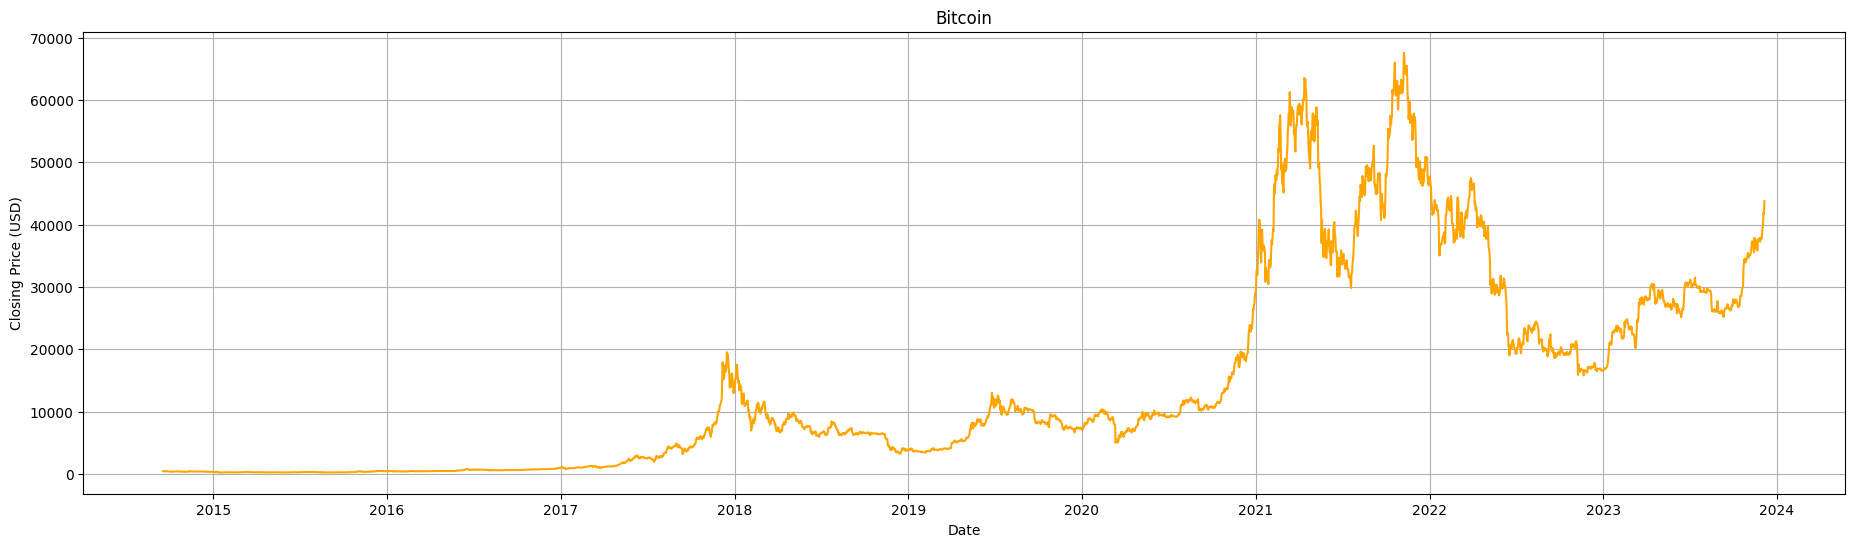

In [579]:

# Bitcoin
hintakehitys_vuosien_aikana("Bitcoin", "orange", bitcoin_data, "Bitcoin")



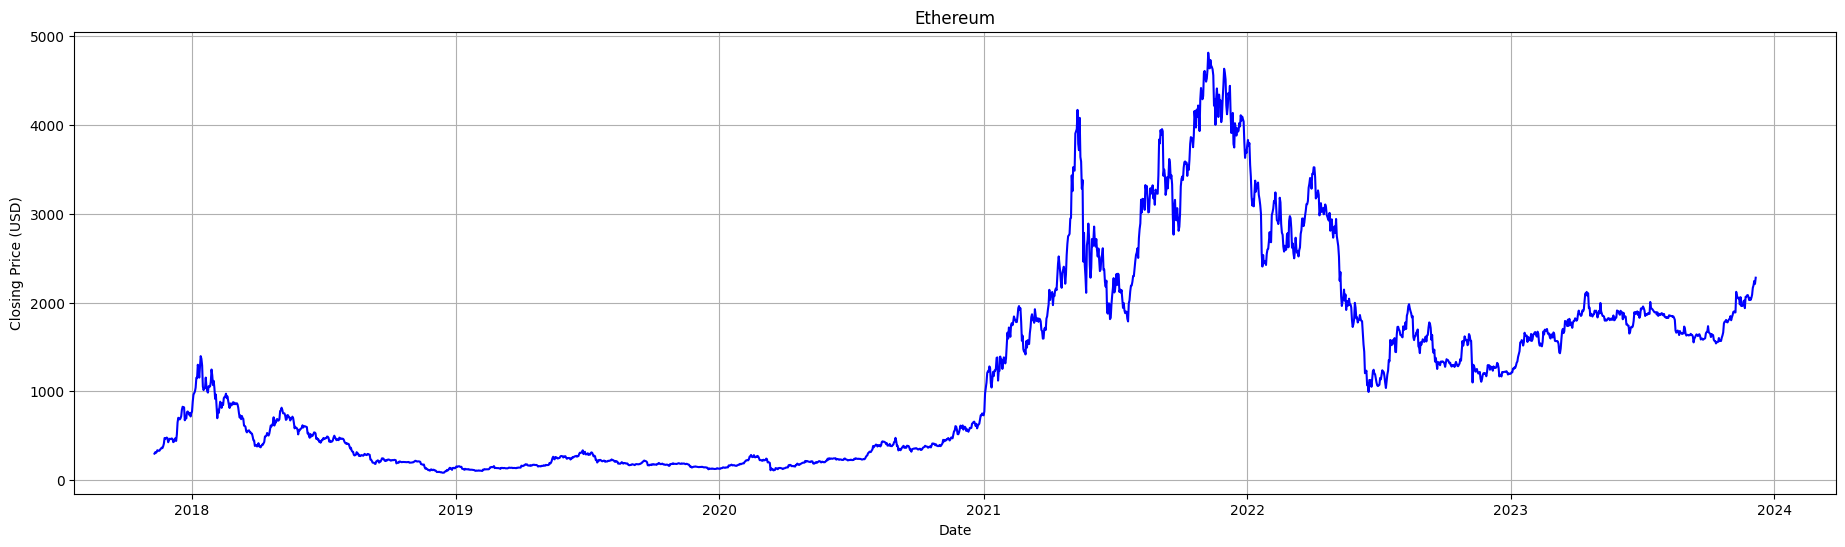

In [580]:
# Ethereum
hintakehitys_vuosien_aikana("Ethereum", "blue", ethereum_data, "Ethereum")


### Bitcoinin ja Ethereum alin ja ylin hinta vuosien aikana

In [581]:
# Bitcoin
min_close_price_btc = bitcoin_data['Close'].min()
max_close_price_btc = bitcoin_data['Close'].max()

print("Bitcoinin pienin sulkeutumishinta:", round(min_close_price_btc, 2), "USD")
print("Bitcoinin suurin sulkeutumishinta:", round(max_close_price_btc, 2), "USD")

# Ethereum
min_close_price_eth = ethereum_data['Close'].min()
max_close_price_eth = ethereum_data['Close'].max()

print("Ethereumin pienin sulkeutumishinta:", round(min_close_price_eth, 2), "USD")
print("Ethereumin suurin sulkeutumishinta:", round(max_close_price_eth, 2), "USD")


Bitcoinin pienin sulkeutumishinta: 178.1 USD
Bitcoinin suurin sulkeutumishinta: 67566.83 USD
Ethereumin pienin sulkeutumishinta: 84.31 USD
Ethereumin suurin sulkeutumishinta: 4812.09 USD


### Keskimääräinen ja mediaani volyymi vuosien aikana

In [582]:
# Bitcoin 
mean_volume_btc = bitcoin_data['Volume'].mean()
median_volume_btc = bitcoin_data['Volume'].median()

print("Bitcoinin keskimääräinen volyymi:", round(mean_volume_btc, 2))
print("Bitcoinin mediaani volyymi:", round(median_volume_btc, 2))

Bitcoinin keskimääräinen volyymi: 16513285298.86
Bitcoinin mediaani volyymi: 11090276850.0


#### Keskimääräinen Volyymi: 
Bitcoinin keskimääräinen päivittäinen kaupankäyntivolyymi on noin 16.51 miljardia USD. Tämä luku saadaan laskemalla yhteen kaikki volyymiarvot ja jakamalla ne päivien määrällä. Keskimääräinen volyymi antaa käsityksen siitä, kuinka paljon Bitcoinia on keskimäärin vaihdettu päivässä. Suuri keskimääräinen volyymi voi viitata vahvaan kiinnostukseen ja likviditeettiin Bitcoin-markkinoilla, mikä voi olla merkki aktiivisesta kaupankäynnistä ja suuresta osallistujamäärästä.

#### Mediaani Volyymi: 
Bitcoinin mediaani kaupankäyntivolyymi on noin 11.09 miljardia USD. Mediaani, joka on volyymiarvojen keskimmäinen luku, on vähemmän altis ääriarvojen vaikutuksille kuin keskiarvo. Tämä mediaaniarvo viittaa siihen, että "tyypillisessä" päivässä Bitcoinin kaupankäyntivolyymi oli noin 11.09 miljardia USD.

On huomattava, että keskimääräinen volyymi on huomattavasti suurempi kuin mediaani volyymi. Tämä ero voi viitata siihen, että on ollut useita päiviä erittäin suurilla volyymeillä, jotka nostavat keskiarvoa. Tällaiset päivät voivat liittyä merkittäviin markkinatapahtumiin, kuten uutisiin, jotka vaikuttavat merkittävästi Bitcoinin hintaan ja aiheuttavat suurta kaupankäyntiaktiivisuutta.

In [583]:
# Ethereum
mean_volume_eth = ethereum_data['Volume'].mean()
median_volume_eth = ethereum_data['Volume'].median()

print("Ethereumin keskimääräinen volyymi:", round(mean_volume_eth, 2))
print("Ethereumin mediaani volyymi:", round(median_volume_eth, 2))

Ethereumin keskimääräinen volyymi: 12055796732.83
Ethereumin mediaani volyymi: 9315805225.0


#### Keskimääräinen Volyymi: 
Ethereumin keskimääräinen päivittäinen kaupankäyntivolyymi koko datasetin ajan on noin 12.05 miljardia USD.

#### Mediaani Volyymi: 
Ethereumin mediaani kaupankäyntivolyymi on noin 9.30 miljardia USD.

## Bitcoinin ja Ethereumin hintakehitys vuonna 2023

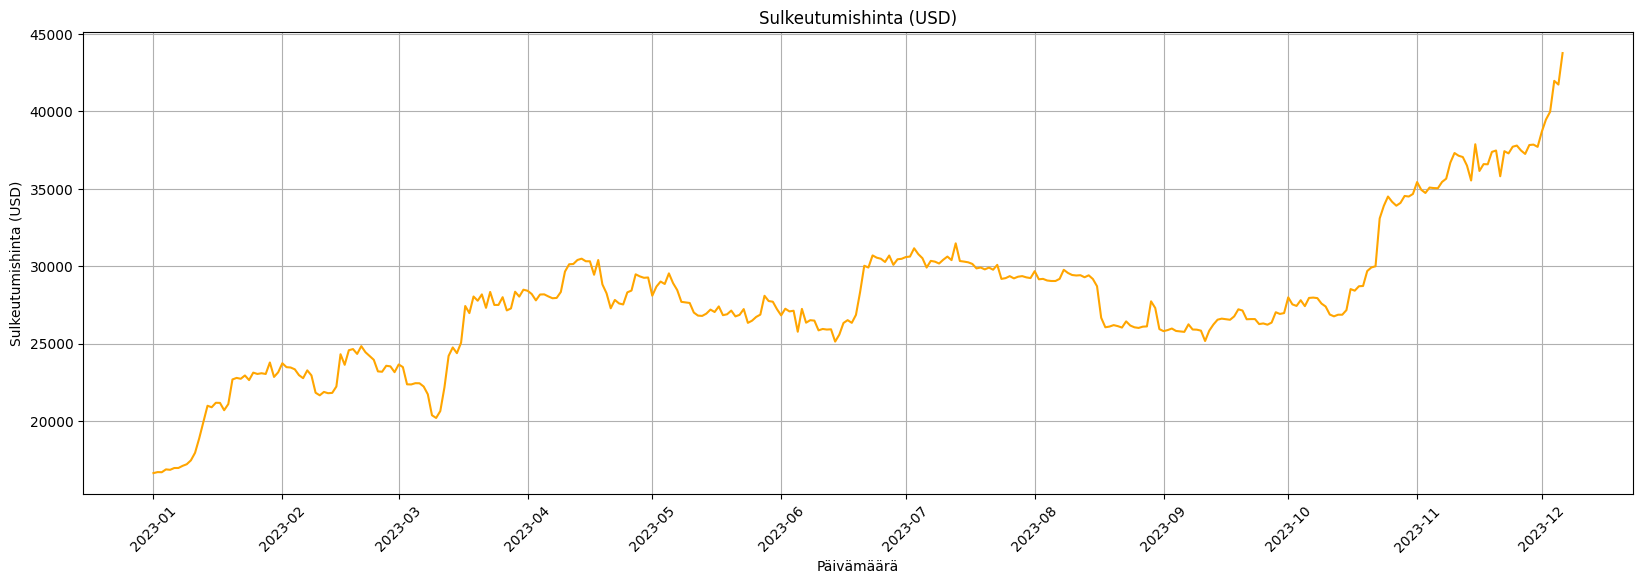

In [584]:

hintakehitys_2023("Bitcoin", "orange", btc_2023, "Sulkeutumishinta (USD)")


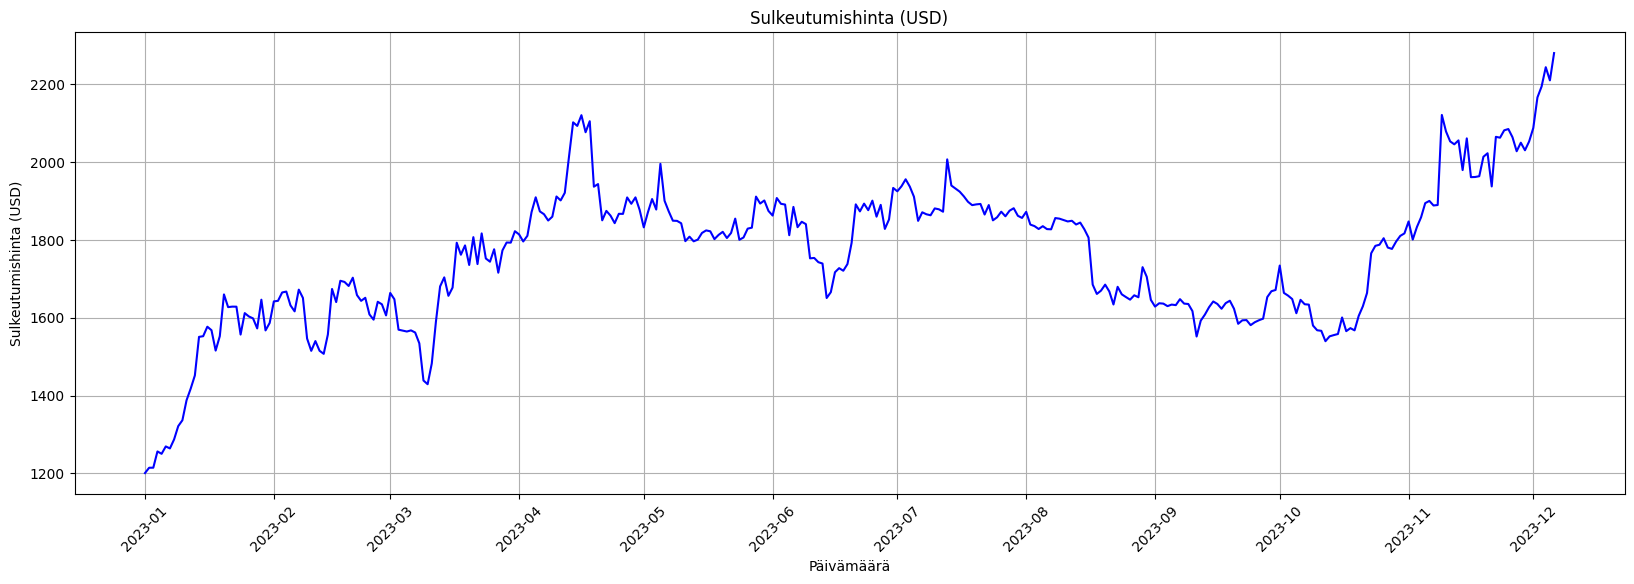

In [585]:
# ETH 2023
hintakehitys_2023("Ethereum", "blue", eth_2023, "Sulkeutumishinta (USD)")

### Bitcoinin ja Ethereumin ylin ja alin hinta vuonna 2023


Bitcoinin pienin sulkeutumishinta: 16625.08 USD
Bitcoinin suurin sulkeutumishinta: 43775.21 USD


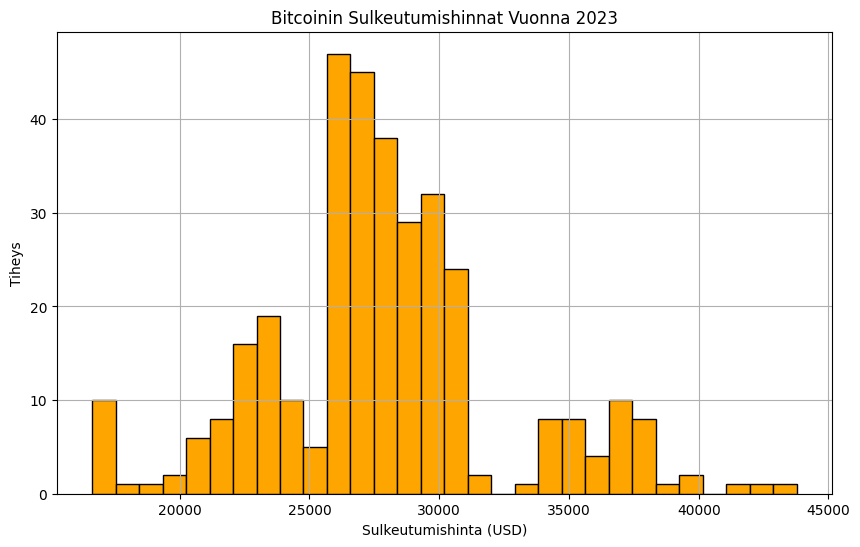

In [586]:
# Bitcoin
min_close_price_btc_2023 = btc_2023['Close'].min()
max_close_price_btc_2023 = btc_2023['Close'].max()


print("Bitcoinin pienin sulkeutumishinta:", round(min_close_price_btc_2023, 2), "USD")
print("Bitcoinin suurin sulkeutumishinta:", round(max_close_price_btc_2023, 2), "USD")

sulkeutumishinnat_2023(btc_2023['Close'], 'Bitcoinin Sulkeutumishinnat Vuonna 2023', 'Sulkeutumishinta (USD)', 'Tiheys', bins=30, color='orange')

Ethereumin pienin sulkeutumishinta: 1200.96 USD
Ethereumin suurin sulkeutumishinta: 2279.49 USD


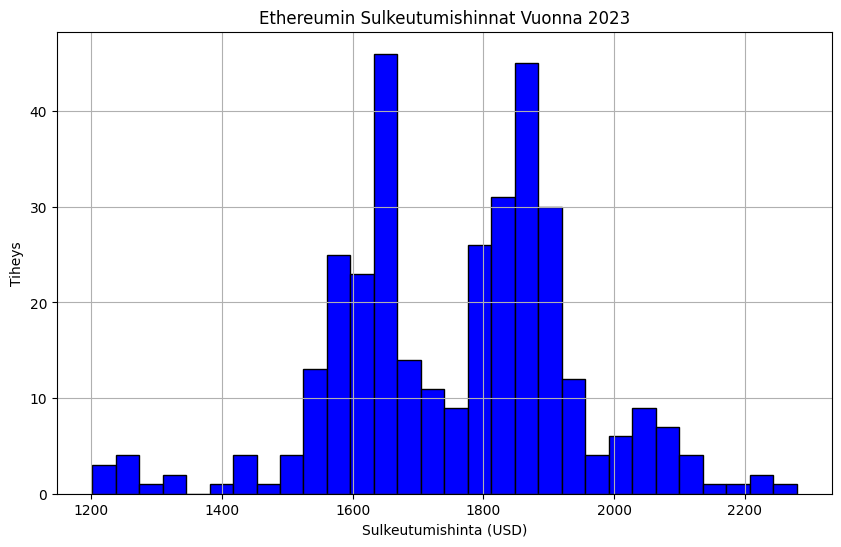

In [587]:
# Ethereum
min_close_price_eth_2023 = eth_2023['Close'].min()
max_close_price_eth_2023 = eth_2023['Close'].max()

print("Ethereumin pienin sulkeutumishinta:", round(min_close_price_eth_2023, 2), "USD")
print("Ethereumin suurin sulkeutumishinta:", round(max_close_price_eth_2023, 2), "USD")
sulkeutumishinnat_2023(eth_2023['Close'], 'Ethereumin Sulkeutumishinnat Vuonna 2023', 'Sulkeutumishinta (USD)', 'Tiheys', bins=30, color='blue')

Histogrammin korkeimmat pylväät osoittavat, mitkä sulkeutumishintahaarukat olivat yleisimpiä vuonna 2023. Jos esimerkiksi näemme korkeita pylväitä tietyssä hintavälissä, se tarkoittaa, että sulkeutumishinta oli usein tässä haarukassa. Tämä voi viitata siihen, että markkinat pitivät tätä hintatasoa suhteellisen vakaana tai houkuttelevana sijoituksena tuona aikana.

Alueet, joissa pylväät ovat matalampia, edustavat hintahaarukoita, jotka olivat vähemmän yleisiä. Nämä alueet voivat edustaa hintapiikkejä tai -romahduksia, jotka olivat lyhytaikaisia tai harvinaisempia.

### Paljonko Bitcoinin ja Ethereumin hinta on noussut vuonna 2023 prosentuaalisesti?

In [588]:
# Lasketaan Bitcoinin hinnan prosentuaalinen muutos vuodelle 2023
start_price_btc_2023 = btc_2023["Close"].iloc[0]
end_price_btc_2023 = btc_2023["Close"].iloc[-1]
percentage_change_btc_2023 = ((end_price_btc_2023 - start_price_btc_2023) / start_price_btc_2023) * 100
pyoristetty_muutos_btc = round(percentage_change_btc_2023, 2)


# Lasketaan Ethereum hinnan prosentuaalinen muutos vuodelle 2023
start_price_eth_2023 = eth_2023["Close"].iloc[0]
end_price_eth_2023 = eth_2023["Close"].iloc[-1]
percentage_change_eth_2023 = ((end_price_eth_2023 - start_price_eth_2023) / start_price_eth_2023) * 100
pyoristetty_muutos_eth = round(percentage_change_eth_2023, 2)

markdown_text = f"""
### Bitcoinin hinta on vuonna 2023 noussut {pyoristetty_muutos_btc}%\n
### Ethereumin hinta on vuonna 2023 noussut {pyoristetty_muutos_eth}%
"""

display(Markdown(markdown_text))


### Bitcoinin hinta on vuonna 2023 noussut 163.31%

### Ethereumin hinta on vuonna 2023 noussut 89.81%


### Kumulatiivinen tuotto

In [589]:
# Lasketaan päivittäiset tuotot ja niiden kumulatiiviset arvot
daily_returns = btc_2023["Close"].pct_change()
cumulative_sum = daily_returns.cumsum()
cumulative_product = (1 + daily_returns).cumprod() - 1

# Piirretään kumulatiiviset tuotot
plt.figure(figsize=(12, 6))
plt.plot(cumulative_sum, label="Cumulative Sum of Returns", color="blue")
plt.plot(cumulative_product, label="Cumulative Product of Returns", color="green")

# Annotaatiot ja otsikot
plt.title("Bitcoin 2023 Kumulatiiviset Tuotot")
plt.xlabel("Date")
plt.ylabel("Kumuulatiiviset Tuotot")
plt.legend()
plt.grid(True)

plt.show()

NameError: name 'btc_2023_changes' is not defined

### Volatiliteetti vuoden 2023 aikana

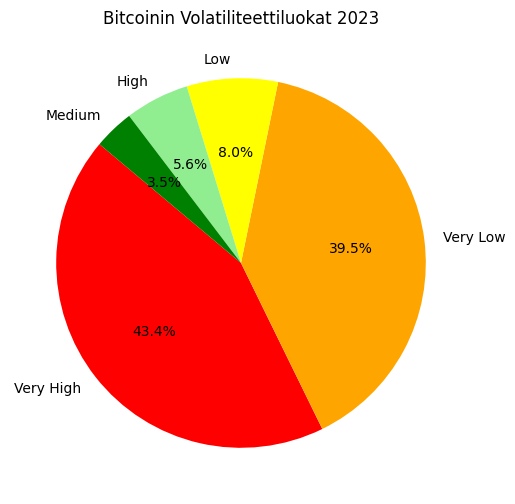

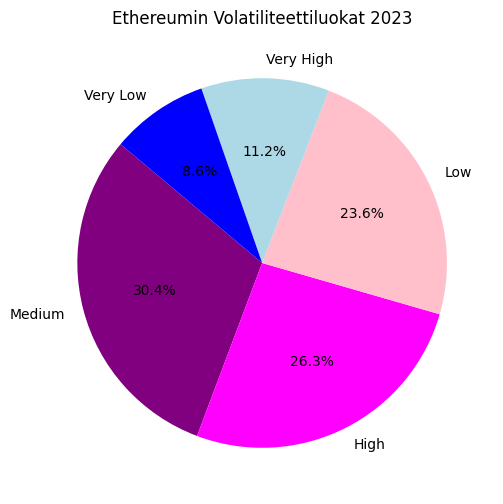

In [ ]:
bins = [-np.inf, -50, -10, 10, 50, np.inf]
labels = ["Very Low", "Low", "Medium", "High", "Very High"]

# Luodaan värit volatiliteettiluokkia varten
colors_btc = ["red", "orange", "yellow", "lightgreen", "green"]
colors_eth = ["purple", "magenta", "pink", "lightblue", "blue"]

# Luodaan syvät kopiot (deep copy) rajoitetusta datasta
btc_2023_copy = btc_2023.copy()
eth_2023_copy = eth_2023.copy()

# Lasketaan volatiliteettiluokkien tiheydet vuodelle 2023 käyttäen kopioita
btc_volatility_counts = laske_volatiliteetti(btc_2023_copy, bins, labels)
eth_volatility_counts = laske_volatiliteetti(eth_2023_copy, bins, labels)

# Piirretään ympyärädiagrammit
volatiliteetti_2023(btc_volatility_counts, "Bitcoinin Volatiliteettiluokat 2023", colors_btc)
volatiliteetti_2023(eth_volatility_counts, "Ethereumin Volatiliteettiluokat 2023", colors_eth)


#### Bitcoinin Volatiliteetti

Bitcoinin piechartin perusteella havaitaan, että sen volatiliteetti vuonna 2023 jakautui merkittävästi 'Very High' ja 'Very Low' luokkiin. Tämä osoittaa, että Bitcoin koki usein joko hyvin suuria tai hyvin pieniä päivittäisiä hintamuutoksia. Tällainen jakautuminen voi viitata siihen, että Bitcoin-markkinat olivat alttiita sekä merkittäville nousuille että laskuille, mikä osoittaa korkeaa volatiliteettia ja mahdollisesti suurta epävarmuutta tai spekulatiivista kaupankäyntiä.

#### Ethereumin Volatiliteetti

Ethereumin piechartissa havaitaan, että sen volatiliteetti jakautui tasaisemmin eri luokkien välillä. Ethereum näyttää kokeneen sekä maltillisia että suurempia hintamuutoksia, mutta ei yhtä usein äärimmäisiä muutoksia kuin Bitcoin.

### Bitcoinin kuukausittainen keskihinta

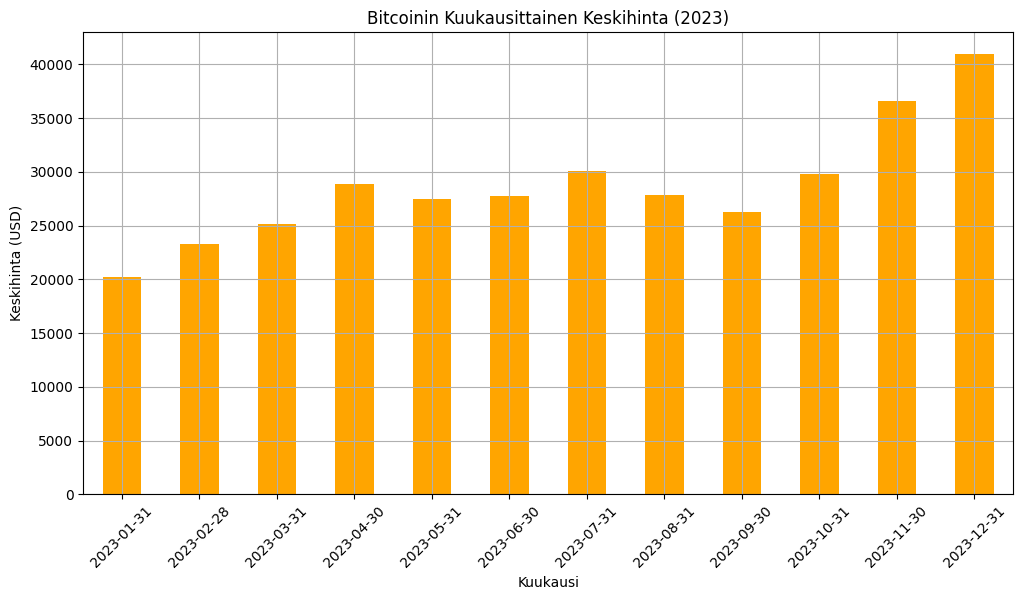

In [ ]:
# Lasketaan Bitcoinin kuukausittainen keskihinta vuodelle 2023
btc_monthly_mean = btc_2023['Close'].resample('M').mean()

# Luodaan pylväsdiagrammi kuukausittaisesta keskihinnasta
plt.figure(figsize=(12, 6))
btc_monthly_mean.plot(kind='bar', color='orange')
plt.title('Bitcoinin Kuukausittainen Keskihinta (2023)')
plt.xlabel('Kuukausi')
plt.ylabel('Keskihinta (USD)')
plt.xticks(ticks=range(len(btc_monthly_mean.index)), labels=[date.strftime('%Y-%m-%d') for date in btc_monthly_mean.index], rotation=45)
plt.grid(True)
plt.show()

- Tammikuu: 20,250.72 USD
- Helmikuu: 23,304.54 USD
- Maaliskuu: 25,116.90 USD
- Huhtikuu: 28,853.86 USD
- Toukokuu: 27,499.31 USD
- Kesäkuu: 27,763.20 USD
- Heinäkuu: 30,057.47 USD
- Elokuu: 27,852.79 USD
- Syyskuu: 26,306.14 USD
- Lokakuu: 29,767.93 USD
- Marraskuu: 36,596.16 USD
- Joulukuu: 40,372.59 USD

## Bitcoin halving

Bitcoin halving (puoliintuminen) on tapahtuma, jossa uusien bitcoinin tarjonta putoaa 50 prosenttia. Ensimmäinen Bitcoin halving tapahtui marraskuussa 2012. Halving on Bitcoinin koodiin ohjelmoitu tapahtuma, joka linkittyy vahvasti louhintaan. 

### Miten Bitcoin Halving Toimii?

Halving tapahtuu noin neljän vuoden välein. Halving pitää huolta siitä, että bitcoinien liikkeelle laskettu määrä ei koskaan ylitä 21 miljoonaa kappaletta. Seuraava Bitcoin halving nähdään huhtikuussa 2024. Bitcoinin perustamishetkellä (2009) louhijat saivat palkkioiksi peräti 50 bitcoinia per lohko. Lohkopalkkio on puolitettu tämän jälkeen kolme kertaa: 50 BTC -> 25 BTC -> 12,5 BTC -> 6,25 BTC.

### Aikajana

Yhteensä halving-tapahtumia nähdään 32 kappaletta, jonka jälkeen kaikki 21 miljoonaa bitcoinia on louhittu. Viimeinen halving tapahtuu noin vuonna 2140.

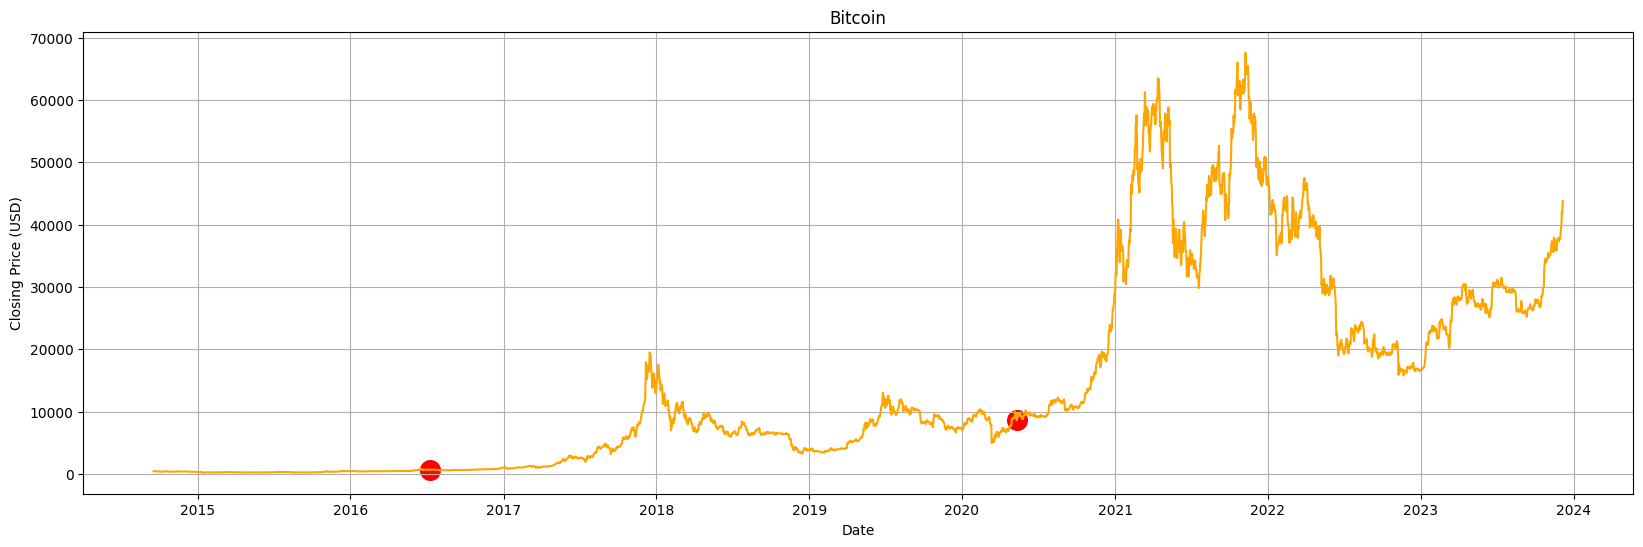

In [ ]:
# Määritä halvingin päivämäärät datetime-tyypiksi
halving_dates = [pd.to_datetime("2012-11-28"), pd.to_datetime("2016-07-09"), pd.to_datetime("2020-05-11")]

# Bitcoinin hintakehityksen kaavio
plt.figure(figsize=(20, 6))
plt.plot(bitcoin_data["Close"], label="Bitcoin", color="orange")

# Lisää ympyrät halvingin päivämäärille
for date in halving_dates:
    if date in bitcoin_data.index:
        plt.scatter(date, bitcoin_data.loc[date, "Close"], color="red", s=200)

plt.title("Bitcoin")
plt.xlabel("Date")
plt.ylabel("Closing Price (USD)")
plt.grid(True)
plt.show()

### Halvingin vaikutukset Bitcoinin hintaan

Bitcoin-halvingilla on merkittäviä vaikutuksia koko Bitcoinin hintaan. Halvingit ovat yksi puhutuimmista tapahtumista kryptovaluuttojen maailmassa.

On tärkeää muistaa että historiallinen kehitys **_ei ole tae tulevasta_**, mutta Bitcoinin kurssi on tehnyt merkittäviä liikkeitä edellisten puoliintumisten jälkeen kuten:

- Vuoden 2016 halvingia seurasi valtava kryptovaluuttabuumi vuonna 2017
- Vuoden 2020 halvingin jälkeen nähtiin merkittävä nousumarkkina vuonna 2021

## Bitcoinin suhde yhdysvaltain dollariin


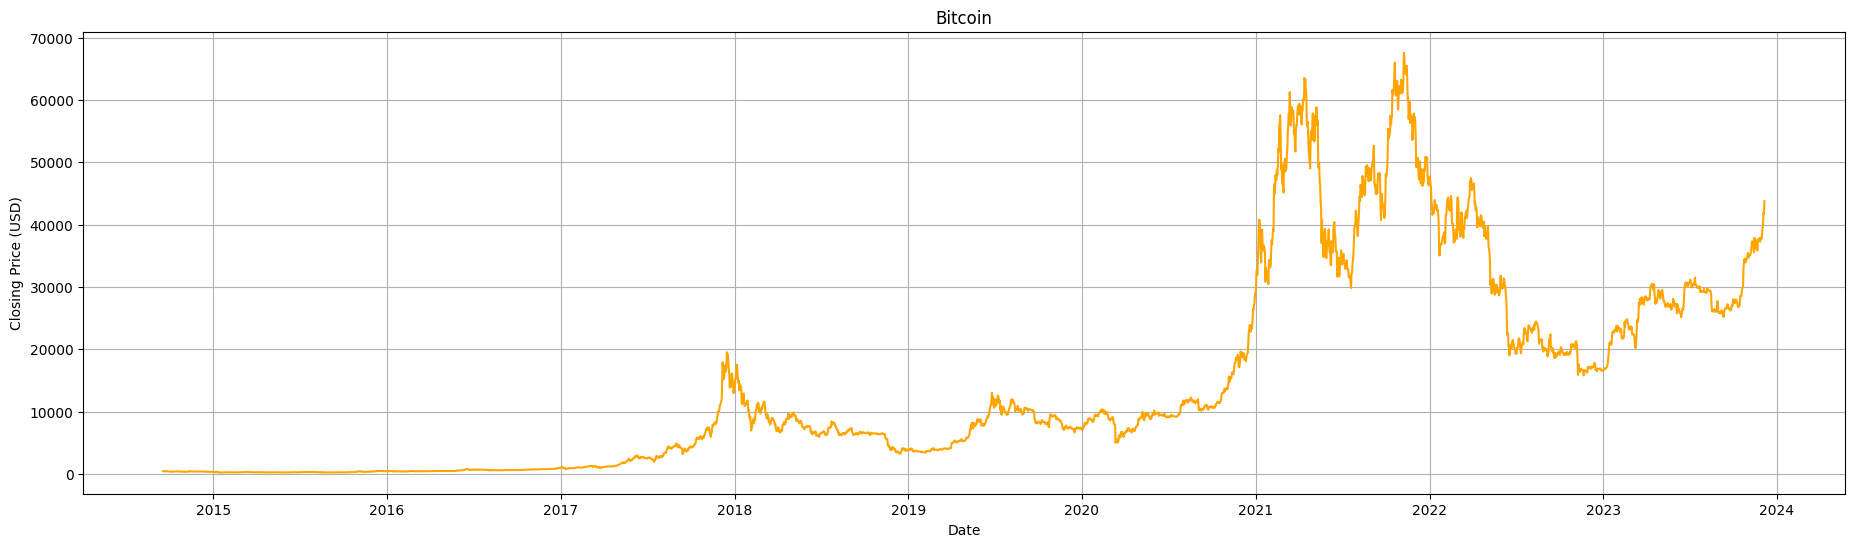

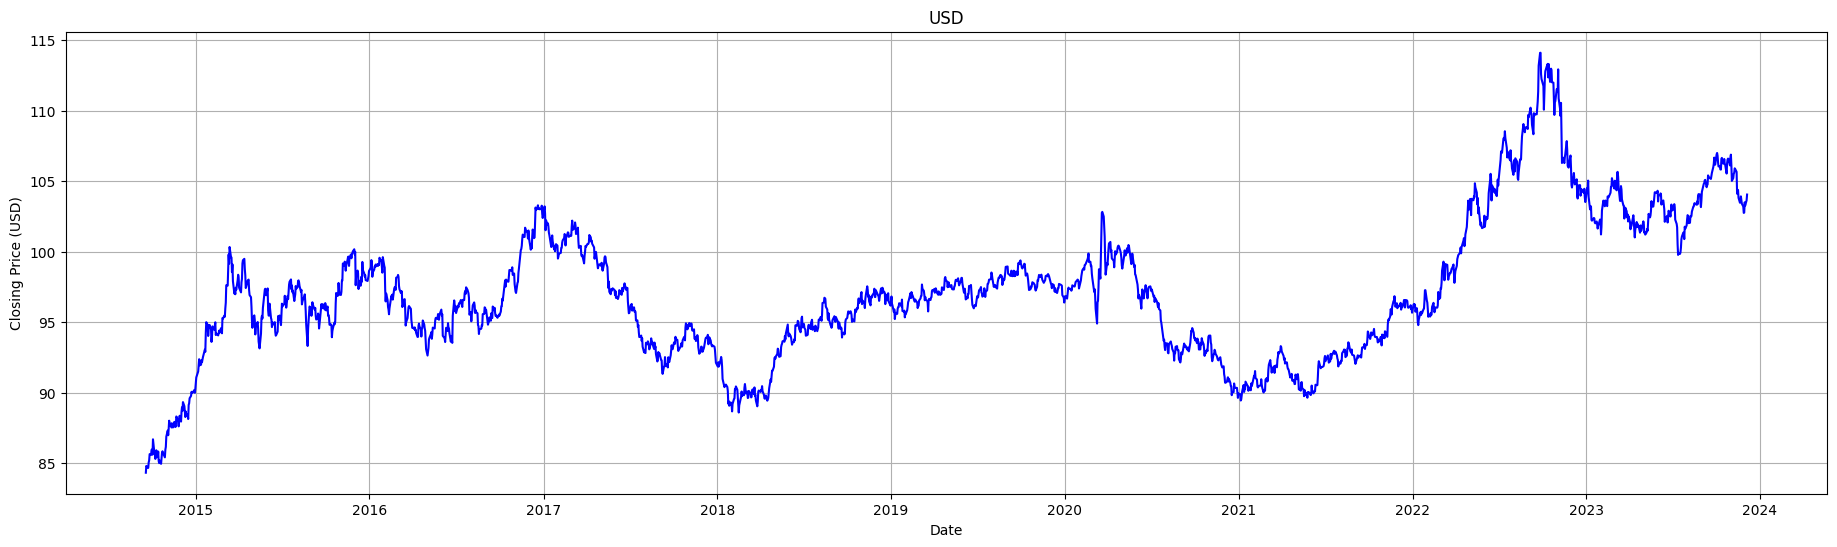

In [ ]:
# Bitcoin
hintakehitys_vuosien_aikana("Bitcoin", "orange", bitcoin_data, "Bitcoin")
# USD
hintakehitys_vuosien_aikana("USD", "blue", usd_data, "USD")

### Huomioita

- Kun Bitcoin on ollut nousumarkkinassa, dollari on ollut laskumarkkinassa ja päinvastoin.

##### Miksi? 
Kun USD:n arvo laskee tai on epävakaa, sijoittajat voivat siirtää varojaan perinteisistä valuutoista kryptovaluuttoihin, kuten Bitcoiniin, etsiessään suojaa inflaatiolta tai valuuttakurssien heilahtelulta.

Jos dollari heikkenee suhteessa muihin valuuttoihin, se voi lisätä Bitcoinin houkuttelevuutta globaalina varallisuuden säilytysvälineenä. Bitcoinia pidetään usein "digitaalisena kullan" ja vaihtoehtona perinteisille valuutoille.

On tärkeää kuitenkin muistaa, että vaikka nämä tekijät voivat selittää osan havaitusta korrelaatiosta, Bitcoinin ja dollarin välillä ei ole välttämättä suoraa tai johdonmukaista suhdetta. Markkinat ovat monimutkaisia ja niihin vaikuttavat monet erilaiset tekijät, ja siksi yksittäisten trendien analysointi voi olla haastavaa.

## Vuodet 2024 - 2025

Vaikka Bitcoin on käyttäytynyt tietyllä tavoin historiassa, kurssikehitys voi olla täysin erilaista tulevaisuudessa. Bitcoin on muuttunut valtavasti sijoitusluokkana sen alkuvuosista.
- Bitcoinin markkina-arvo on nyt merkittävästi korkeampi kuin aiempien halvingien aikaan, mikä tekee kurssin noususta vaikeampaa.
- Bitcoinin kursseja on ohjannut viime vuosina keskuspankkien toiminta ja osakemarkkinan liikkeet.

Halving tapahtuu, kun Bitcoinin lohkoketjuun on louhittu lohko numero 840.000. Vuoden 2024 puoliintumisessa lohkopalkkio pienenee 6,25 bitcoinista 3,125 bitcoiniin.

Vuonna 2024 nähdään todennäköisesti keskuspankkien siirtyminen kohti löysempää rahapolitiikkaa. Ohjauskorot kääntyvät laskuun, ja globaali likviditeetti alkaa kasvaa.  Todennäköisesti muutos nähdään -24 loppupuolella. Tämä johtaisi **_todennäköisesti_** nousuun myös Bitcoinin kurssissa.